In [1]:
import pandas as pd
import numpy as np
import pandas_gbq as gbq
import pydata_google_auth
import seaborn as sns
import matplotlib.pylab as plt
import datetime

In [4]:
def bigquery_auth():
    SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',]
    
    credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    # Set auth_local_webserver to True to have a slightly more convienient
    # authorization flow. Note, this doesn't work if you're running from a
    # notebook on a remote sever, such as over SSH or with Google Colab.
    auth_local_webserver=True,)

bigquery_auth()

In [12]:
type_query = '''SELECT TYPE,
        COUNT(*) AS type_total
FROM `user_type.user_entering_type`
GROUP BY TYPE
'''

In [14]:
user_type = gbq.read_gbq(type_query, project_id='ntufbdata')

Downloading: 100%|██████████| 4/4 [00:01<00:00,  3.42rows/s]


Text(0.5, 1.0, 'Amount of Different Type of Users')

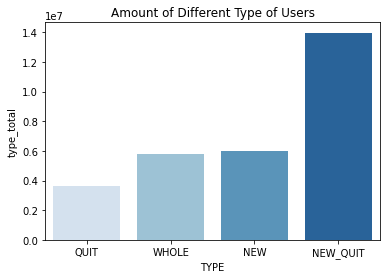

In [18]:
user_type = user_type.sort_values(by="type_total").reset_index(drop=True)
ax = sns.barplot(x=user_type.TYPE, y=user_type.type_total, palette='Blues')
ax.set_title('Amount of Different Type of Users')

In [19]:
start_query = '''SELECT start_week,
        COUNT(*) AS start_total
FROM `user_type.user_entering_type`
GROUP BY start_week
'''

In [20]:
start_total = gbq.read_gbq(start_query, project_id='ntufbdata')

Downloading: 100%|██████████| 82/82 [00:00<00:00, 285.83rows/s]


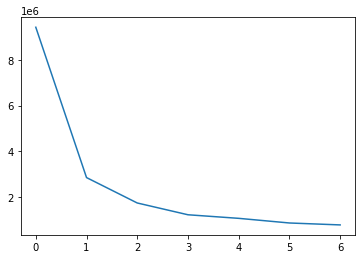

In [36]:
start_total = start_total.sort_values(by="start_week").reset_index(drop=True)
plt.plot(start_total[start_total.start_week >= '2015-06-16']['start_total'])
plt.plot(start_total[start_total.start_week < '2015-06-16']['start_total'])

In [29]:
quit_query = '''SELECT quit_week,
        COUNT(*) AS quit_total
FROM `user_type.user_entering_type`
GROUP BY quit_week
'''

In [30]:
quit_total = gbq.read_gbq(quit_query, project_id='ntufbdata')

Downloading: 100%|██████████| 82/82 [00:00<00:00, 310.92rows/s]


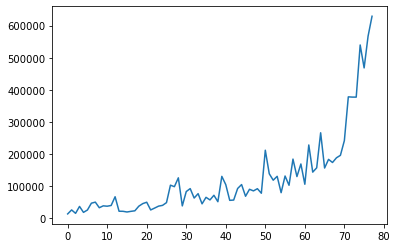

In [44]:
quit_total = quit_total.sort_values(by="quit_week").reset_index(drop=True)
plt.plot(quit_total[quit_total.quit_week < '2016-10-30']['quit_total'])

In [40]:
quit_total

,quit_week,quit_total
0,2015-05-03,12327
1,2015-05-10,24767
2,2015-05-17,14133
3,2015-05-24,35703
4,2015-05-31,17153
...,...,...
77,2016-10-23,629334
78,2016-10-30,1089767
79,2016-11-06,3388022
80,2016-11-13,3617176
